In [35]:

from collections import defaultdict
import matplotlib.pyplot as plt
import vcf

## STEP 1

In [36]:
# Open the VCF file for reading
vcf_file = "example_header.vcf"
with open(vcf_file, mode='r') as vcf:
    print(vcf.read())
    

##fileformat=VCFv4.1
##FILTER=<ID=LowConf,Description="GQ < 20.0">
##FILTER=<ID=LowQual,Description="Low quality">
##FILTER=<ID=VQSRTrancheINDEL92.00to93.00,Description="Truth sensitivity tranche level for INDEL model at VQS Lod: 1.2161 <= x < 1.3077">
##FILTER=<ID=VQSRTrancheINDEL93.00to93.50,Description="Truth sensitivity tranche level for INDEL model at VQS Lod: 1.1649 <= x < 1.2161">
##FILTER=<ID=VQSRTrancheINDEL93.50to94.00,Description="Truth sensitivity tranche level for INDEL model at VQS Lod: 1.1086 <= x < 1.1649">
##FILTER=<ID=VQSRTrancheINDEL94.00to95.00,Description="Truth sensitivity tranche level for INDEL model at VQS Lod: 0.9775 <= x < 1.1086">
##FILTER=<ID=VQSRTrancheINDEL95.00to96.00,Description="Truth sensitivity tranche level for INDEL model at VQS Lod: 0.8122 <= x < 0.9775">
##FILTER=<ID=VQSRTrancheINDEL96.00to97.00,Description="Truth sensitivity tranche level for INDEL model at VQS Lod: 0.5826 <= x < 0.8122">
##FILTER=<ID=VQSRTrancheINDEL97.00to99.00,Description="Tr

In [37]:
# Define the file path
# vcf_file = "your_vcf_file.vcf"

# Open the VCF file
with open(vcf_file, "r") as file:
    in_header = True  # A flag to indicate whether we are in the header section
    header_lines = []  # Store header lines
    data_lines = []  # Store data lines

    # Iterate through the lines in the file
    for line in file:
        if in_header:
            # Check if this line is part of the header
            if line.startswith("##"):
                header_lines.append(line)
            else:
                in_header = False  # We reached the end of the header
                data_lines.append(line)
        else:
            data_lines.append(line)

# Process the header lines
for header_line in header_lines:
    print(header_line.strip())  # Print each header line

# Process the data lines (variants)
for data_line in data_lines:
    print(data_line.strip())  # Print each data line


##fileformat=VCFv4.1
##FILTER=<ID=LowConf,Description="GQ < 20.0">
##FILTER=<ID=LowQual,Description="Low quality">
##FILTER=<ID=VQSRTrancheINDEL92.00to93.00,Description="Truth sensitivity tranche level for INDEL model at VQS Lod: 1.2161 <= x < 1.3077">
##FILTER=<ID=VQSRTrancheINDEL93.00to93.50,Description="Truth sensitivity tranche level for INDEL model at VQS Lod: 1.1649 <= x < 1.2161">
##FILTER=<ID=VQSRTrancheINDEL93.50to94.00,Description="Truth sensitivity tranche level for INDEL model at VQS Lod: 1.1086 <= x < 1.1649">
##FILTER=<ID=VQSRTrancheINDEL94.00to95.00,Description="Truth sensitivity tranche level for INDEL model at VQS Lod: 0.9775 <= x < 1.1086">
##FILTER=<ID=VQSRTrancheINDEL95.00to96.00,Description="Truth sensitivity tranche level for INDEL model at VQS Lod: 0.8122 <= x < 0.9775">
##FILTER=<ID=VQSRTrancheINDEL96.00to97.00,Description="Truth sensitivity tranche level for INDEL model at VQS Lod: 0.5826 <= x < 0.8122">
##FILTER=<ID=VQSRTrancheINDEL97.00to99.00,Description="Tr

## STEP 2

In [39]:
# Initialize counters for each individual
individual_counts = defaultdict(int)

# Read the VCF file
with open('trio_example.vcf', 'r') as vcf_file:
    for line in vcf_file:
        if not line.startswith('#'):
            fields = line.strip().split('\t')
            var_type = fields[4]  # Get the variant type from the ALT field
            individual = fields[0]  # Assuming the individual's identifier is in the first column
            individual_counts[individual] += 1

# Print the results as a table
print("Number of SNVs detected by variant type for each individual in 'trio_example.vcf':\n")
print("| Individual  | Total SNVs |")
print("|-------------|------------|")
for individual, count in individual_counts.items():
    print(f"|     {individual}     |     {count}     |")

# Print the total SNVs detected for each individual
print("\n- Total SNVs detected for each individual:")
for individual, count in individual_counts.items():
    print(f"{individual}: {count} SNVs")


Number of SNVs detected by variant type for each individual in 'trio_example.vcf':

| Individual  | Total SNVs |
|------------|------------|
|     7     |     394286     |
|     20     |     150602     |
|     X     |     13798     |

- Total SNVs detected for each individual:
7: 394286 SNVs
20: 150602 SNVs
X: 13798 SNVs


## Step 3

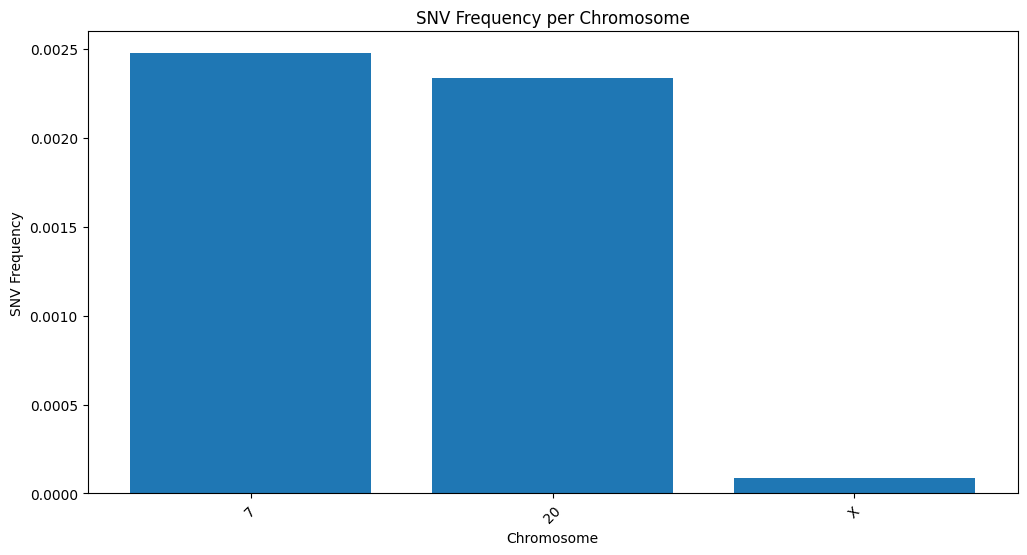

Frequency of SNVs per chromosome:

| Chromosome | Frequency |
|------------|-----------|
|     7     |     0.002474     |
|     20     |     0.002337     |
|     X     |     0.000088     |


In [52]:
def get_chromosome_lengths_from_tsv(tsv_file):
    chromosome_lengths = {}
    with open(tsv_file, "r") as file:
        next(file)  # Skip the header line
        for line in file:
            parts = line.strip().split("\t")
            chromosome_name = parts[0]
            chromosome_length = int(parts[1])
            chromosome_lengths[chromosome_name] = chromosome_length
    return chromosome_lengths

# Read the VCF file and get the chromosome lengths
chromosome_lengths = get_chromosome_lengths_from_tsv("chromosome_lengths.tsv")

# Initialize counters for each chromosome
snv_counts = defaultdict(int)

# Read the VCF file
with open('trio_example.vcf', 'r') as vcf_file:
    for line in vcf_file:
        if not line.startswith('#'):
            fields = line.strip().split('\t')
            chromosome = fields[0]  # Get the chromosome from the CHROM field
            snv_counts[chromosome] += 1

# Calculate the frequency of SNVs per chromosome
frequency_per_chromosome = {
    chromosome: snv_count / chromosome_lengths[chromosome]
    for chromosome, snv_count in snv_counts.items()
}

# Plot the results
plt.figure(figsize=(12, 6))
plt.bar(frequency_per_chromosome.keys(), frequency_per_chromosome.values())
plt.xlabel('Chromosome')
plt.ylabel('SNV Frequency')
plt.title('SNV Frequency per Chromosome')
plt.xticks(rotation=45)
plt.show()

# Display the results as a table
print("Frequency of SNVs per chromosome:\n")
print("| Chromosome | Frequency |")
print("|------------|-----------|")
for chromosome, frequency in frequency_per_chromosome.items():
    print(f"|     {chromosome}     |     {frequency:.6f}     |")


## Step 4

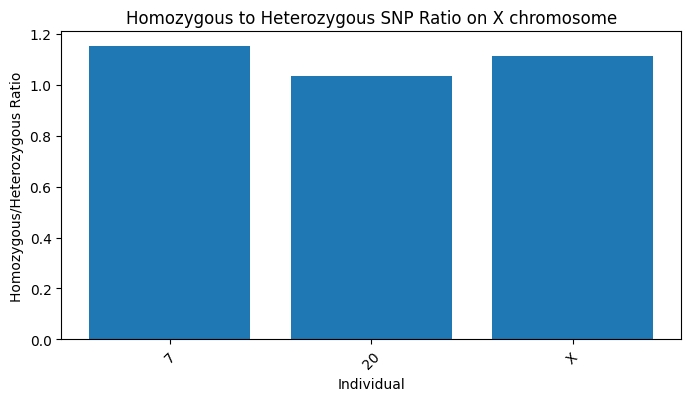

Homozygous to Heterozygous SNP Ratio on X chromosome:

| Individual | Ratio     |
|------------|-----------|
| 7 | 1.151177 |
| 20 | 1.035176 |
| X | 1.110907 |


In [56]:
# Initialize counters for homozygous and heterozygous SNPs
homozygous_counts = defaultdict(int)
heterozygous_counts = defaultdict(int)

# Read the VCF file
with open('trio_example.vcf', 'r') as vcf_file:
    for line in vcf_file:
        if not line.startswith('#'):
            fields = line.strip().split('\t')
            chromosome = fields[0]
            genotype = fields[9]  # Assuming that individual genotypes are in this column
            alleles = genotype.split(':')[0].split('/')
            if alleles[0] == alleles[1]:
                homozygous_counts[chromosome] += 1
            else:
                heterozygous_counts[chromosome] += 1

# Calculate the ratio of homozygous to heterozygous SNPs for each individual
ratios = {ind: homozygous_counts[ind] / (heterozygous_counts[ind] + 1) for ind in homozygous_counts}

# Plot the results
plt.figure(figsize=(8, 4))
plt.bar(ratios.keys(), ratios.values())
plt.xlabel('Individual')
plt.ylabel('Homozygous/Heterozygous Ratio')
plt.title('Homozygous to Heterozygous SNP Ratio on X chromosome')
plt.xticks(rotation=45)
plt.show()

# Display the results as a table
print("Homozygous to Heterozygous SNP Ratio on X chromosome:\n")
print("| Individual | Ratio     |")
print("|------------|-----------|")
for individual, ratio in ratios.items():
    print(f"| {individual} | {ratio:.6f} |")


## Step 5

In [67]:
# Initialize dictionaries to store variants for each individual
individual_variants_de_novo = defaultdict(list)
individual_variants_private = defaultdict(set)

# Read the VCF file
with open('trio_example.vcf', 'r') as vcf_file:
    for line in vcf_file:
        if not line.startswith('#'):
            fields = line.strip().split('\t')
            individual = fields[0]
            variant_type = fields[4]  # Get the variant type from the ALT field
            individual_variants_de_novo[individual].append(variant_type)
            individual_variants_private[individual].add(variant_type)

# Find de novo mutations for each individual
de_novo_mutations = {}
for individual, variants in individual_variants_de_novo.items():
    other_individuals = [i for i in individual_variants_de_novo if i != individual]
    de_novo_mutations[individual] = [variant for variant in variants if all(variant not in individual_variants_de_novo[other] for other in other_individuals)]

# Find 'private' mutations for each individual
private_mutations = {}
for individual in individual_variants_private:
    other_individuals = [i for i in individual_variants_private if i != individual]
    private_mutations[individual] = individual_variants_private[individual] - set.union(*(individual_variants_private[other] for other in other_individuals))

# Identify the child based on the most 'private' mutations
child = max(private_mutations, key=lambda x: len(private_mutations[x]))

# Print the number and types of de novo mutations for each individual
for individual, mutations in de_novo_mutations.items():
    print(f"Individual {individual} has {len(mutations)} de novo mutations.")
    # print(', '.join(mutations))

# Print the 'private' mutations for each individual and identify the child
for individual, mutations in private_mutations.items():
    print(f"Individual {individual} has {len(mutations)} 'private' mutations.")
print(f"The child, identified by the most 'private' mutations, is Individual {child}.")

Individual 7 has 2065 de novo mutations.
Individual 20 has 697 de novo mutations.
Individual X has 77 de novo mutations.
Individual 7 has 1708 'private' mutations.
Individual 20 has 665 'private' mutations.
Individual X has 76 'private' mutations.
The child, identified by the most 'private' mutations, is Individual 7.
